# Physionet LTDB: Wandering baseline example

Data from https://physionet.org/content/ltdb/1.0.0/

In [34]:
import wfdb
import matplotlib.pyplot as plt
import locomotif.locomotif as locomotif
from locomotif.locomotif import LoCoMotif, similarity_matrix_ndim, estimate_tau_from_am
from locomotif.visualize import plot_motif_sets
from dtaidistance.preprocessing import differencing

In [70]:
# Download data directly from the website
record = wfdb.rdrecord('14149', pn_dir='ltdb/1.0.0')

# Reuse stored data
record = wfdb.rdrecord('rsrc/physionet-ltdb/14149')

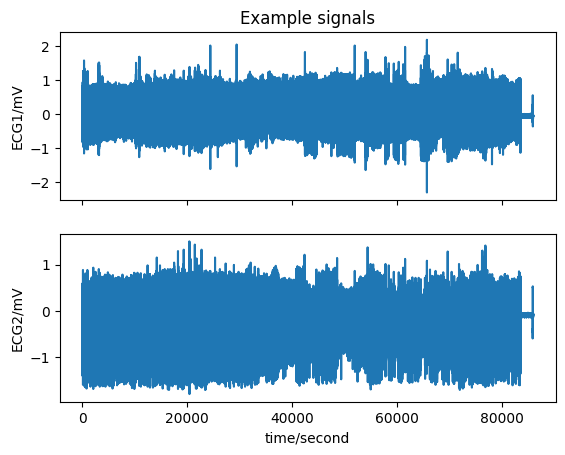

In [69]:
wfdb.plot_wfdb(record=record, title='Example signals')

We will take a snapshot out of the full series where there is a clear wandering baseline

In [57]:
series = record.p_signal[49630:50500,0]

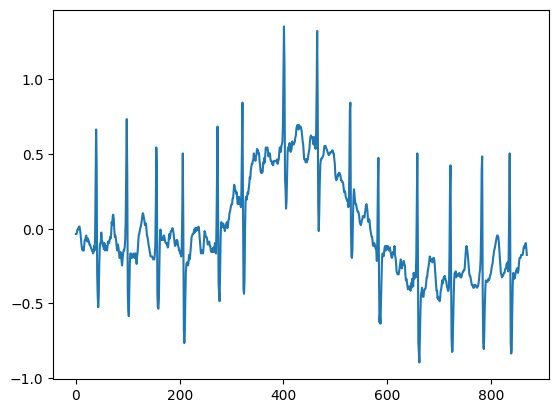

In [58]:
plt.plot(series);

To be able to deal with baseline wandering we will make use of differencing and a low pass filter. After applying differencing, LoCoMotif finds the motif set perfectly.

/var/folders/99/qdfpdjgn4s31972_bhjhbtrm0000gn/T/ipykernel_36120/4082253044.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


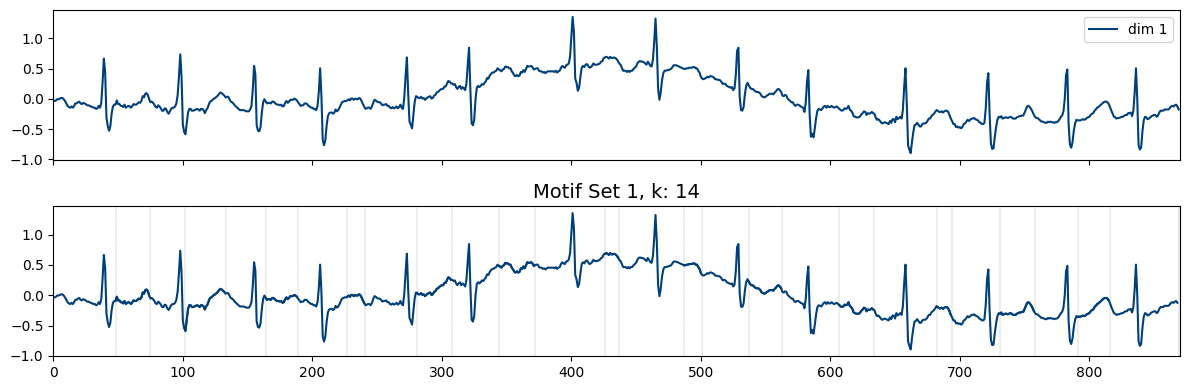

In [65]:
rho = 0.25
nb_motifs = 10
l_min = 70
l_max = 110
overlap = 0.50

start_mask = None

seriesd = differencing(series, smooth=0.1)
# seriesd = series

motif_sets = locomotif.apply_locomotif(seriesd, rho, l_min, l_max, nb_motifs, overlap=overlap, start_mask=start_mask,
                                           end_mask=None)
fig, ax = plot_motif_sets(series, motif_sets)
fig.show()

In the plot above, we show the original data. Underneath you can see the differenced signals and where the motifs are found (every beat is a motif).

/var/folders/99/qdfpdjgn4s31972_bhjhbtrm0000gn/T/ipykernel_36120/3158566471.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


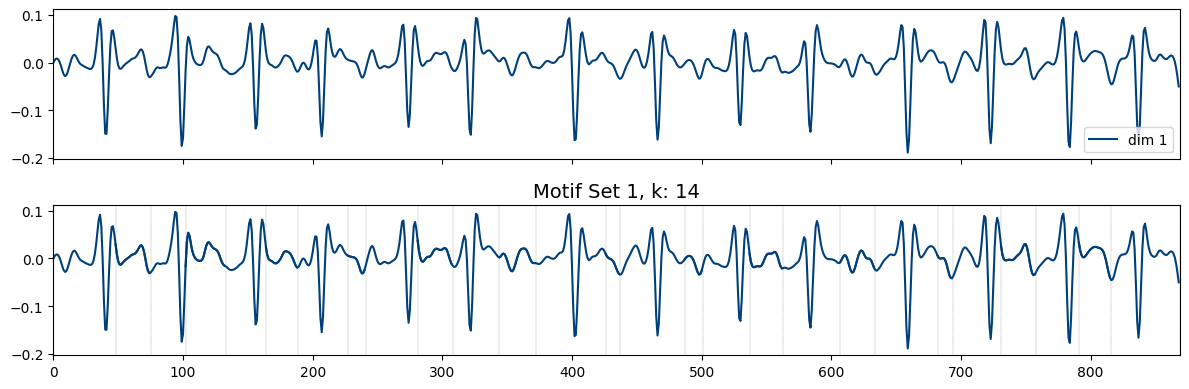

In [66]:
fig, ax = plot_motif_sets(seriesd, motif_sets)
fig.show()

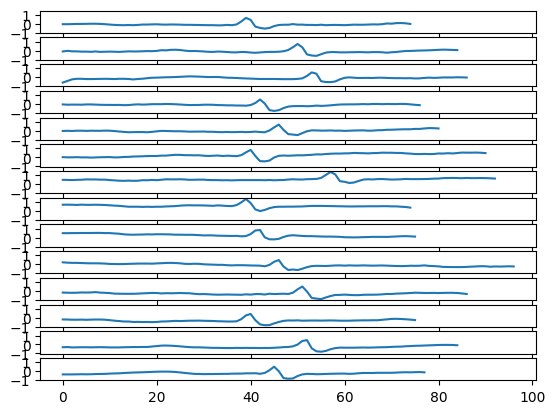

In [67]:
fig, axs = plt.subplots(nrows=len(motif_sets[0]), ncols=1, sharex=True, sharey=True)
for pi, (bi, ei) in enumerate(motif_sets[0]):
    axs[pi].plot(series[bi:ei])